In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# 1. Veriyi yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize et ve şekli düzenle
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. Modeli oluştur
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. Derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Eğit
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9129 - loss: 0.3004 - val_accuracy: 0.9806 - val_loss: 0.0586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9857 - val_loss: 0.0416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9871 - val_loss: 0.0387
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9842 - val_loss: 0.0480
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9855 - val_loss: 0.0436


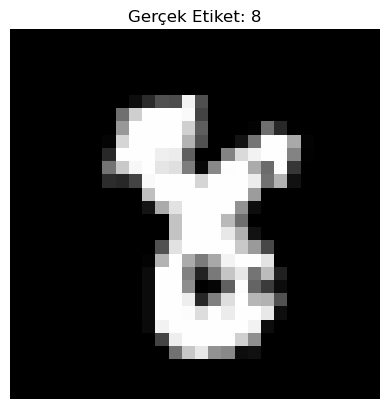

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Modelin Tahmini: 8


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Rastgele bir test örneği seç
index = np.random.randint(0, len(x_test))
img = x_test[index]

# Görüntüyü çiz
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Gerçek Etiket: {np.argmax(y_test[index])}")
plt.axis('off')
plt.show()

# Modelin tahmini
prediction = model.predict(img.reshape(1, 28, 28, 1))
print("Modelin Tahmini:", np.argmax(prediction))


In [4]:
model.save("mnist_model.h5")
